<a href="https://colab.research.google.com/github/BurgundyIsAPublicEnemy/EPIDEMIUM-Season-3/blob/analysis/AnalysisNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Medical Explanation of Elneny
Elneny is a multi-modal convolutional network based on siamese similarity pretraining model, with both convolutional and tabular DL elements combined into one element. While performant (topping the ORL/IA leaderboar), it's complexity is a challenge to explain.

The challenge is: determine a statistical link between the presence of one or more markers, in the tumor, in the stroma or in the microenvironment as a whole and better overall survival. 

We determine this in two methods:

1) Leave-One-Out Strategy to determine marker importance

2) Tabular Feature importance using XGBoost

# Leave-One-Out Strategy to select out markers
Prior to the experiment, we asked our medical expertise to come up with hypothesis based on their knowledge as to which layers are the most important.

In this experiment, we retrain our model repeatedly, changing which markers we include. Using RunModel Notebook and filtering out layers on the 'layers' column, each model is trained 5 times across all folds, and validated 5 times.

Originally, we trained the model with all the data to allow it to decide for itself what features are important and which are not. Here, we present the following: 

| Markers   | Loss        |
| --------- | ----------- |
| 1,2,3,5   | 6.33381664  |
| 2,3,5     | 7.57255362  |
| 3         | 7.902646    |
| 5         | 8.1658692   |
| 3,5,6     | 8.3443338   |
| All       | 8.9123384   |
| 2,3       | 9.78866528  |
| 1,2,3,5,6 | 10.50769776 |
| 4         | 11.10145488 |
| 6         | 11.9080366  |
| 1         | 13.3617568  |
| 2         | 13.8633732  |




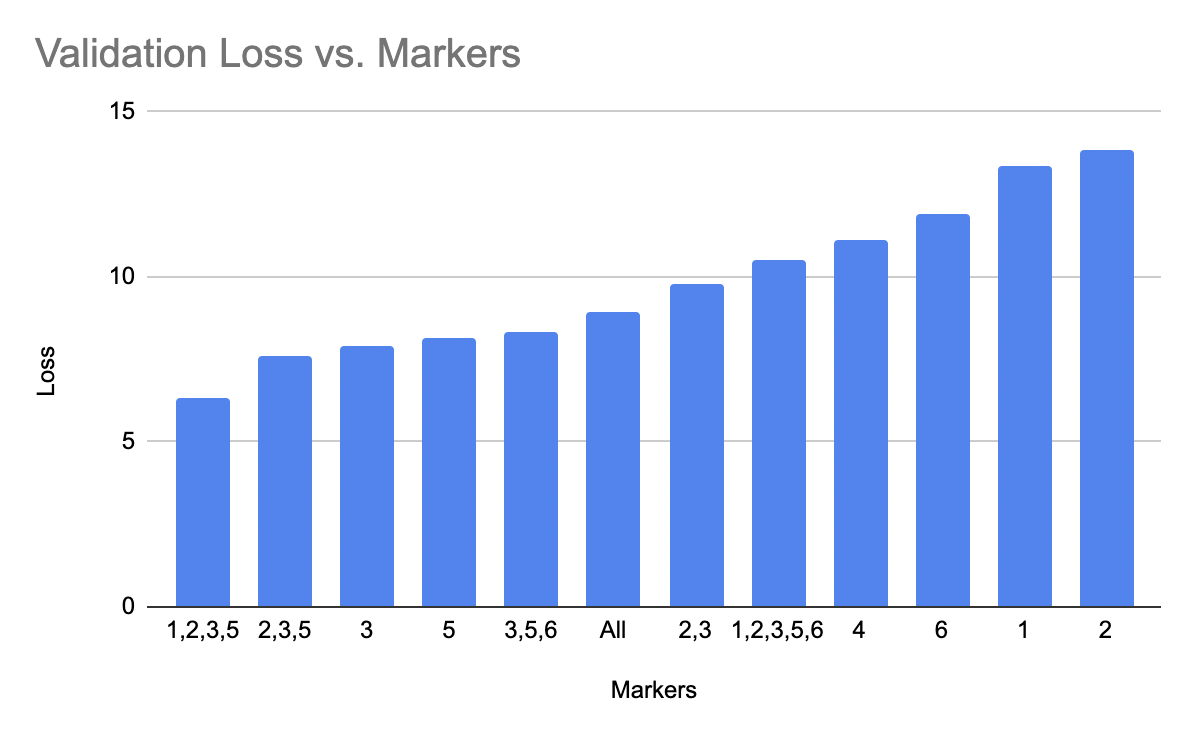

One can see that layers 1,2,3,5 produce the model with the best results, proving that one layer is not outright better than the others.

However, 3 and 5 prove to be very good on their own

But why is this the case?

## Medical insights as to what might be going on here

1 is all over in short and long OS. There is more of it in the tumour that live long.

Marker 2 are in the vessels and tumours of people who tend to live long 

Marker 3 look like cells without nuclei... is it possible that Marker 3 could be virus clumps ! 

Marker 5 might be the PD-1 cells (exhausted cells) and the amount of it varies the OS. For shorter OS, inside tumour and longer OS, outside.

Marker 4 and 6 could be the ligand for exhausted cells. We believe Marker 6 has artefacts which leads to very bright signals from blood vessels and that's been negatively impacting our scores.

We evaluated using photoshops to look at some examples across a range of OS (the examples has OS linked to whether alive or dead)

[Photoshops](https://drive.google.com/drive/folders/1WkdhKHGTfkvUSN7JE78-sIQAf7MtuRKC?usp=sharing)



# Feature Importance from Tabular


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import sklearn

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Kaggle/ORLIA/train_img_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Kaggle/ORLIA/test_img_data.csv")

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/ORLIA/train_img_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ORLIA/test_img_data.csv")

In [ ]:
test_df.head()

,id,usage,image_file,image_rename,current_directory,layer,img_type,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,N,M,Tabac,Alcool,Data,id_encoding,image_rename_encoding
0,aabb0e,test,"aabb0e_[12238,43627]_composite_image.jpg","raw_Cellule inflamatoire 4_aabb0e_[12238,43627...",/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellule inflamatoire 4,raw,1,1,69.0,9.0,60,1,1,0,1,4,NaN,1,3,1,Image + clinical,1,136
1,a7b285,test,"a7b285_[13407,58051]_composite_image.jpg",raw_Cellules tumorales et cellules inflammatoi...,/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellules tumorales et cellules inflammatoires 3,raw,1,1,76.0,7.0,69,0,0,0,0,2,NaN,0,0,0,Image + clinical,0,200
2,ac3e32,test,"ac3e32_[11938,49725]_composite_image.jpg",raw_Cellules tumorales et cellules inflammatoi...,/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellules tumorales et cellules inflammatoires 3,raw,1,1,69.0,7.0,61,0,0,0,2,4,2.0,0,1,1,Image + clinical,2,208
3,b462ff,test,"b462ff_[11684,45221]_composite_image.jpg","raw_Cellule inflamatoire 1_b462ff_[11684,45221...",/content/drive/MyDrive/Kaggle/ORLIA/Test/,Cellule inflamatoire 1,raw,0,1,89.0,10.0,78,1,1,0,2,4,NaN,0,3,1,Image + clinical,7,92
4,ac8a8b,test,"ac8a8b_[16004,54038]_image_with_tissue_seg.jpg","composite_segmentation_tissue_ac8a8b_[16004,54...",/content/drive/MyDrive/Kaggle/ORLIA/Test/,segmentation_tissue,raw,0,1,68.0,9.0,59,0,0,0,2,4,NaN,0,3,1,Image + clinical,3,29


In [ ]:
train_data.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool
0,0,1,65.0,10.0,55,0,0,0,2,1,0,2,1
1,1,1,76.0,7.0,69,1,0,0,1,2,0,3,1
2,1,1,84.0,8.0,76,1,0,0,1,4,1,2,1
3,1,1,54.0,9.0,44,0,0,0,2,3,0,3,1
4,0,0,63.0,9.0,54,0,0,0,2,2,0,0,1


In [ ]:
train_data.drop(['id' , 'usage' ,'image_file' ,'image_rename' ,'current_directory' ,'layer' ,'img_type' ,'N' ,'Data' ,'id_encoding' ,'image_rename_encoding'], axis=1, inplace=True)
test_df.drop(['id' , 'usage' ,'image_file' ,'image_rename' ,'current_directory' ,'layer' ,'img_type' ,'N' ,'Data' ,'id_encoding' ,'image_rename_encoding'], axis=1, inplace=True)

#Drop dups
train_data = train_data.drop_duplicates()
test_df = test_df.drop_duplicates()

labels = train_data['OS']


In [ ]:
train_data.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool,OS
0,0,1,65.0,10.0,55,0,0,0,2,1,0,2,1,45
1,1,1,76.0,7.0,69,1,0,0,1,2,0,3,1,18
2,1,1,84.0,8.0,76,1,0,0,1,4,1,2,1,21
3,1,1,54.0,9.0,44,0,0,0,2,3,0,3,1,47
4,0,0,63.0,9.0,54,0,0,0,2,2,0,0,1,70


In [ ]:
len(train_data)

42

In [ ]:
train_data.drop(['OS'], axis=1, inplace=True)

In [ ]:
train_data.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool
0,0,1,65.0,10.0,55,0,0,0,2,1,0,2,1
1,1,1,76.0,7.0,69,1,0,0,1,2,0,3,1
2,1,1,84.0,8.0,76,1,0,0,1,4,1,2,1
3,1,1,54.0,9.0,44,0,0,0,2,3,0,3,1
4,0,0,63.0,9.0,54,0,0,0,2,2,0,0,1


In [ ]:
len(labels)

42

In [ ]:
test_df.head()

,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,M,Tabac,Alcool
0,1,1,69.0,9.0,60,1,1,0,1,4,1,3,1
1,1,1,76.0,7.0,69,0,0,0,0,2,0,0,0
2,1,1,69.0,7.0,61,0,0,0,2,4,0,1,1
3,0,1,89.0,10.0,78,1,1,0,2,4,0,3,1
4,0,1,68.0,9.0,59,0,0,0,2,4,0,3,1


In [ ]:
len(test_df)

9

In [ ]:
!pip install shap

In [ ]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost 

model = XGBRegressor()

X = train_data
y = labels
# split dataset into input and output columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "subsample": 0.5,
    "eval_metric": "mae",
    "max_depth": 8,
    "eta": 0.5
    
}

# fit model
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=200)

print(y_test)
print(model.predict(d_test))

[0]	test-mae:31.5602
Will train until test-mae hasn't improved in 200 rounds.
[100]	test-mae:6.1346
[200]	test-mae:6.07874
Stopping. Best iteration:
[16]	test-mae:5.65907

39     30
16     53
9      66
46     59
4      70
225    66
24     67
55     47
57     59
Name: OS, dtype: int64
[38.32112  59.887085 67.00676  54.589504 60.989216 67.23759  54.81095
 41.598732 53.95839 ]


In [ ]:
import shap
pred = model.predict(d_test, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(d_test)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()


3.8146973e-05

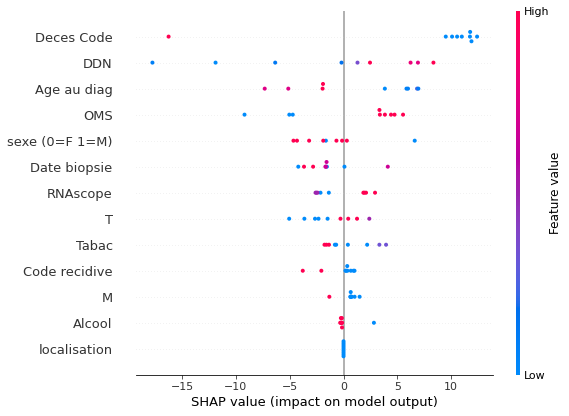

In [ ]:
shap.summary_plot(shap_values, X_test)

# Conclusion
When determining a statistical link between the presence of one or more markers, in the tumor, in the stroma or in the microenvironment as a whole and better overall survival... 

We find that a combination of Markers 3 (Layer 5), 2 (Layer 1) and 5 (Layer 4) and Marker 1 (Layer 8) to be strong indicators for better overall survival, with the corresponding importance individually being: 

5 & 3 > 1 & 2 > 6 & 4 

We believe if 1, 2 and 3 are in the tumour, this is good for suvival
If 5 or 6 is in the tumour, this results in a lower OS

We also find that the age of the patient, whether they died or not (obviously), their gender and severity of condition (OMS) is a strong indicator on OS